In [ ]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import random
import wordcloud
import nltk
import altair as alt
import functools
import matplotlib.pyplot as plt
import squarify
import seaborn as sb

#Reading dataset

In [ ]:
airbnb = pd.read_csv('/content/drive/MyDrive/datasets/listings.csv')

In [ ]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,70820,City View - Sarah's double room.,360195,Sarah,NaN,Windmill Hill,51.43994,-2.59173,Private room,42,3,178,2022-09-10,1.64,5,1,18,NaN
1,117122,City Centre-Waterside Retreat,591555,Marcus,NaN,Clifton,51.45051,-2.61054,Private room,96,1,166,2022-08-14,1.22,1,324,15,NaN
2,176306,The White Room - Central Bristol Art House Ga...,708175,Orla,NaN,Bedminster,51.44101,-2.60121,Private room,32,5,39,2020-08-28,0.33,1,41,0,NaN
3,307634,"'The Sunset Room' Peaceful, Clear Home",1582810,Wendy,NaN,Easton,51.46641,-2.55533,Private room,36,5,30,2022-08-14,0.46,2,155,9,NaN
4,341227,Listed Georgian house in the heart of Bristol.,237360,Samantha,NaN,Ashley,51.46661,-2.58709,Entire home/apt,571,2,108,2022-06-19,0.85,1,357,16,NaN


In [ ]:
airbnb.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               2376
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                        283
reviews_per_month                  283
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           2376
dtype: int64

#Geospatial

In [ ]:
url_topojson = 'https://martinjc.github.io/UK-GeoJSON/json/eng/wards_by_lad/topo_E06000023.json'
data_topojson = alt.topo_feature(url=url_topojson, feature='E06000023')
# interval = alt.selection_interval() 

make=pd.DataFrame(airbnb['neighbourhood'].unique(), columns=['neighbourhood'])
selection = alt.selection_multi(fields=['neighbourhood'])
color = alt.condition(selection, alt.Color('neighbourhood:N', legend=None), alt.value('lightgray'))

background=alt.Chart(data_topojson).mark_geoshape(
    fill='lightgray',
    stroke='white'
).project(reflectY=True,
    type='identity'
).properties(
    height=300,
    width=650
)

points = alt.Chart(airbnb).mark_circle().encode(
    longitude='longitude',
    latitude='latitude',
    size='price',
    tooltip='neighbourhood',
    color=alt.Color('price')
    # color=alt.condition(interval, alt.Color('price:Q'), alt.value('lightgray'))
).transform_filter(selection)
# .add_selection(interval)


make_selector = alt.Chart(make).mark_rect().encode(y=alt.Y('neighbourhood:N'), color=color).properties(
    height=750,
    width=30
).add_selection(selection)

hist= alt.Chart(airbnb).mark_bar().encode(
    alt.X("price:Q", bin=alt.Bin(maxbins=100)),
    y='count()',
).transform_filter(selection).properties(
    height=200,
    width=320
)

bar= alt.Chart(airbnb).mark_bar().encode(
    alt.Y("room_type:N"),
    x='count()',
    tooltip=[
        alt.Tooltip('count()', title='count')]
).transform_filter(selection).properties(
    height=180,
    width=230
)


heatmap=alt.Chart(airbnb,
    title="heatmap of room type bookings by location"
).mark_rect().encode(
    x='neighbourhood:N',
    y='room_type:N',
    color=alt.Color('count():Q', scale=alt.Scale(scheme="blues"), legend=alt.Legend(
        orient='none',
        legendX=570, legendY=590,
        direction='vertical',
        titleAnchor='middle')),
    tooltip=[
        alt.Tooltip('neighbourhood:N', title='Neighbourhood'),
        alt.Tooltip('count():Q', title='No. of bookings')
    ]
).properties(width=560, height=200).transform_filter(selection)
  
(alt.layer(background, points).resolve_scale(color='independent', shape='independent') & ( hist | bar) & heatmap | make_selector)

alt.HConcatChart(...)

#word cloud

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
text = functools.reduce(lambda a,b: a + " " + str(b), airbnb.sample(frac=0.3)['name'])
text = ' '.join([w for w in nltk.word_tokenize(text)])

In [ ]:
wc = wordcloud.WordCloud(max_font_size=40).generate(text)

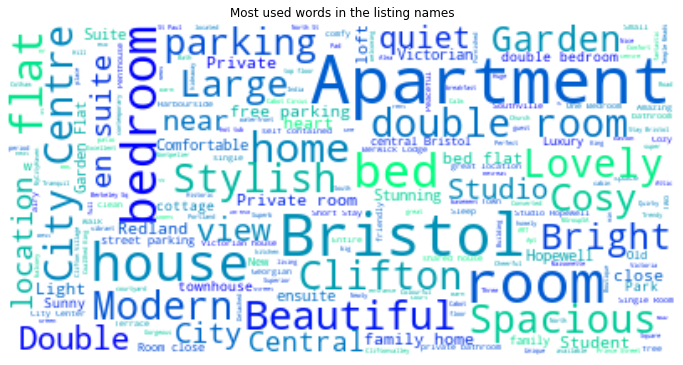

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
wc = wordcloud.WordCloud(background_color='white', max_font_size=40, colormap='winter').generate(text)
ax.imshow(wc, interpolation='bilinear')
ax.set_title("Most used words in the listing names")
plt.axis("off")
fig.show()

In [ ]:
treemap=pd.DataFrame(airbnb['neighbourhood'].value_counts())
treemap['n']=treemap.index
treemap.columns = ['counts','neighbourhood']

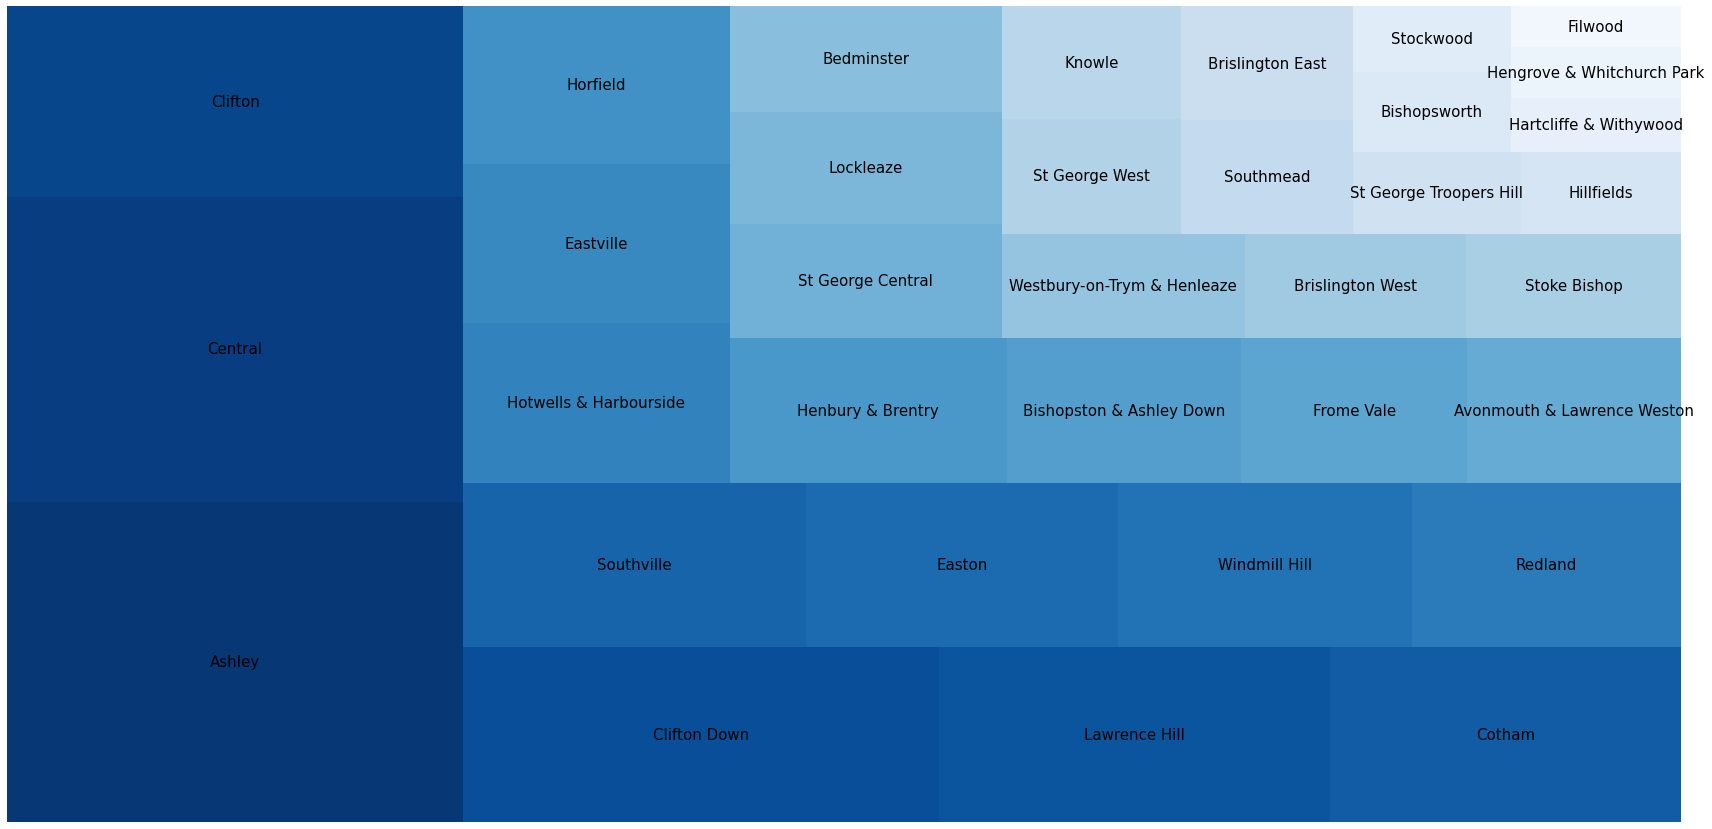

In [ ]:
squarify.plot(treemap['counts'], label=treemap['neighbourhood'], color=sb.color_palette("Blues_r", len(treemap)), text_kwargs={'fontsize': 15})
plt.gcf().set_size_inches(30, 15)
plt.axis('off')
plt.show()